In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

### Import Dataset

In [ ]:
address = r'../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv'
df=pd.read_csv(address)
df.head(10)

In [ ]:
df.describe()

### Attribute Information

 id: unique identifier

 gender: "Male", "Female" or "Other"

 age: age of the patient

 hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

 heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
 
 ever_married: "No" or "Yes"
 
 work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
 
 Residence_type: "Rural" or "Urban"
 
 avg_glucose_level: average glucose level in blood
 
 bmi: body mass index
 
 smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 
 stroke: 1 if the patient had a stroke or 0 if not
 
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
df.info()

#### Remove the ID column as it has no significance


In [ ]:
df=df.drop(labels='id', axis = 1)
df.head()

### Replace object values with numeric values

In [ ]:
labelencoder = LabelEncoder()
df['smoking_status'] = labelencoder.fit_transform(df['smoking_status'])
df['work_type'] = labelencoder.fit_transform(df['work_type'])
df['gender']=pd.get_dummies(df['gender'])
df['ever_married']=pd.get_dummies(df['ever_married'])
df['Residence_type']=pd.get_dummies(df['Residence_type'])
df.head()

### Remove NaN values

Let's check for null values

In [ ]:
df.isnull().sum()

Let's replace the NaN values with the BMI mean value

In [ ]:
med = df['bmi'].mean()
df.bmi.fillna(med, inplace = True)
df.head()

Let's check how many people in the data set have had strokes

In [ ]:
d = df['stroke']==1
print(d.value_counts())
print(249/5109*100,"% has had strokes")

## Correlation chart

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="Accent",annot=True)
plt.show()

In [ ]:
df.hist(bins=50, figsize=(20,15), color = 'Turquoise')
plt.show()

In [ ]:
sns.scatterplot(x=df['age'],y=df['bmi'], hue=df['stroke'], palette="Greens")
plt.title('Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
sns.barplot(x =df['stroke'], y=df['age'],palette="Reds")
plt.title('Age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

In [ ]:
sns.barplot(x=df['Residence_type'], y=df['stroke'],palette="ch:s=-.2,r=.6")
plt.title('Residence Type', fontsize = 20)
plt.xlabel('Place of Residence')
plt.ylabel('Stroke')
plt.show()
print('0 = urban','1 = rural')

In [ ]:
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'], hue=df['stroke'], palette='seismic')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age and Average Glucose Level')
plt.show()

In [ ]:
sns.barplot(x=df['ever_married'],y=df['stroke'],palette="jet_r")
plt.title('Marriage Status', fontsize = 20)
plt.xlabel('Marriage status')
plt.ylabel('Stroke')
plt.show()
print('0 = not married','1 = married')

Let's check how many unknown smoking values there are

In [ ]:
k = df['smoking_status']==0
k.value_counts()

In [ ]:
sns.barplot(x=df['smoking_status'], y=df['stroke'],palette="cubehelix")
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.title('Smoking Status')
plt.show()
print('0 = unknown','1 = formerly','2 = never','3 = smokes')

In [ ]:
plt.scatter(x=df['bmi'],y=df['age'],color='lightseagreen')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Age and BMI correlation')
plt.show()

In [ ]:
plt.figure(figsize = (7, 7))
sns.barplot(x=df['gender'],y=df['stroke'],palette = "cubehelix")
plt.title('Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Stroke')
plt.show()
print('0 = male','1 = female')

In [ ]:
sns.catplot(x="stroke", y="avg_glucose_level", data=df, palette = "magma")
plt.title('Average Glucose Level', fontsize = 10)
plt.xlabel('Stroke')
plt.ylabel('Glucose Levels')
plt.show()

In [ ]:
sns.barplot(x=df['work_type'], y=df['stroke'],palette="viridis")
plt.title('Work Type')
plt.xlabel('Work Field')
plt.ylabel('Stroke')
plt.show()
print('0 = government job','1 = never worked','2 = private','3 = self-employed','4 = children')

In [ ]:
sns.barplot(x="stroke", y="heart_disease", data=df, palette = "cubehelix")
plt.title('Heart Disease', fontsize = 15)
plt.xlabel('Stroke')
plt.ylabel('Heart Disease')
plt.show()
print('0 = no','1 = yes')

In [ ]:
sns.barplot(x=df['hypertension'], y=df['stroke'],palette='flare')
plt.title('Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Stroke')
plt.show()
print('0 = no','1 = yes')

### Divide data into training and testing sets

In [ ]:
x = df.drop('stroke', axis = 1)
y = df.stroke
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

Confusion Matrix Chart

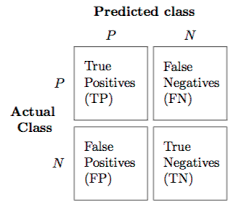

### Dummy Classifier

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train,y_train)
pred = dummy_clf.predict(x_test)
dummy_a=dummy_clf.score(y_test, pred)
print(dummy_a)

Let's check the Dummy Classifier's results

#### Confusion Matrix:

In [ ]:
con_mat = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

### This makes sense since only a small amount of the people in the data actually had strokes.

#### ROC Curve:

In [ ]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, pred)
auc= roc_auc_score(y_test, pred)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

### Decision Tree Classifier

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict = clf.predict(x_test)
decision_a=accuracy_score(y_test, predict)
print(decision_a)

Let's check the Decision Tree Classifier's results

#### Confusion Matrix:

In [ ]:
con_mat = confusion_matrix(y_test, predict)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

#### ROV Curve:

In [ ]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, predict)
auc= roc_auc_score(y_test, predict)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

### KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn_a=accuracy_score(y_test, prediction)
print(knn_a)

Let's look at a range of k values

In [ ]:
for i in range(1,10):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    prediction2 = knn2.predict(x_test)
    print ("For k =", i ,":", metrics.accuracy_score(y_test, prediction2))

The k values accuracy as a curve

In [ ]:
arr = []
for i in range(1,14):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    prediction2 = knn2.predict(x_test)
    arr.append(accuracy_score(y_test, prediction2))
    
plt.plot(range(1,14), arr)
plt.xticks(np.arange(1,14,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

We can see that the optimal k value is k = 8

Let's check the KNN Classifier's results

#### Confusion Matrix:

In [ ]:
confusion = metrics.confusion_matrix(y_test, prediction)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax)
plt.show()

#### ROC Curve:

In [ ]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, prediction)
auc= roc_auc_score(y_test, prediction)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
 
print(f"The score ROC Curve is: {round(auc,3)*100}%")

### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_a = accuracy_score(y_test, logreg_predict)
print(logreg_a)

Let's check the Logistic Regression's results

#### Confusion Matrix:

In [ ]:
con_mat = confusion_matrix(y_test, logreg_predict)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap="CMRmap", fmt = 'g')
plt.show()

#### ROC Curve:

In [ ]:
false_positive_rate, true_positiv_rate, _= roc_curve(y_test, logreg_predict)
auc= roc_auc_score(y_test, logreg_predict)
plt.plot(false_positive_rate, true_positiv_rate, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
print(f"The score ROC Curve is: {round(auc,3)*100}%")

In [ ]:
arrX = ['Dummy Classifier','Decision Tree Classifier','KNN', 'Logistic Regression']
arrY = [ dummy_a,decision_a,knn_a, logreg_a]
plt.plot (arrX, arrY, linestyle='--',color='purple')
plt.title("Model Accuracy Results Comparison", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("Accuracy Score (%)")
plt.show()

# The end